In [1]:
from haar import haar
from pi2 import pi2 
from pi1 import pi1

import numpy as np 

from scipy import integrate
import scipy
from scipy.linalg import lstsq, solve

import matplotlib as mpl
import matplotlib.pyplot as plt 

from numba import njit, prange

mpl.style.use('seaborn')

In [2]:
# y''(x) = -2 y(x) y'(x); y(0) = 0, y'(0) = -1
#@njit(parallel=True)
def wavelet_solve(J): 
    N = 2**(J + 1) 
    j = np.arange(0, N)
    x = (j - 0.5) / N

    alpha1 = 0.
    beta1 = -1.
    a1 = beta1 - alpha1 

    W = np.zeros((N, N)) 
    f = np.zeros((N, )) 
    a = np.zeros((N, ))

    eps = 1.e-6
    r = np.ones((N, 1))

    iter_idx = 0 

    while max(r) > eps: 
        #for j in range(N): 
        #    H = P1 = P2 = 0 
        H = np.zeros((N, ))
        P1 = np.zeros((N, ))
        P2 = np.zeros((N, ))

        for i in prange(N): 
            H += a[i] * haar(x, i+1, J) 
            P1 += a[i] * pi1(x, i+1, J)             
            P2 += a[i] * pi2(x, i+1, J) 

        #print(H.shape, P1.shape, P2.shape)
        #print(f.shape)
        f = 2 * (alpha1 + beta1 * x + P2) * (beta1 + P1) + H 
        #print(f.shape)

        for k in prange(N): 
            W[:, k] = 2 * pi2(x, k+1, J) * (beta1 + P1) + 2 * (alpha1 + beta1 + x + P2) * pi1(x, k+1, J)  + haar(x, k+1, J) 

        #print(W.shape, (W@a).shape, f.shape)
        a_new = np.linalg.pinv(W) @ (W@a - f)
        #print(np.linalg.pinv(W).shape, (W@a - f).shape)
        #print(a_new.shape)
        #a_new = lstsq(W, W@a - f, cond=None)[0]
        #a_new = solve(W, W@a - f) # singularities 
        #a_new = scipy.linalg.inv(W) @ (W@a - f)
        #print(a_new.shape)
        r = np.abs(a_new - a) 
        #print(r.shape)
        print(max(r)) 

        a = a_new 
        iter_idx += 1


    y = np.zeros((N, ))
    S = np.zeros((N, ))

    for i in range(N): 
        S += a[i] * pi2(x, i+1, J)

    y = alpha1 + x * beta1 + S 

    return y, x


In [169]:
def wavelet_solve_ex6(J, n): 
    N = 2**(J + 1) 
    j = np.arange(0, N)
    x = (j - 0.5) / N

    alpha1 = 0.
    beta1 = -1.
    a1 = beta1 - alpha1 

    W = np.zeros((N, N)) 
    f = np.zeros((N, )) 
    a = np.zeros((N, ))

    eps = 1.e-6
    r = np.ones((N, 1))

    iter_idx = 0 

    while max(r) > eps: 
        #for j in range(N): 
        #    H = P1 = P2 = 0 
        H = np.zeros((N, ))
        P1 = np.zeros((N, ))
        P2 = np.zeros((N, ))

        for i in prange(N): 
            H += a[i] * haar(x, i+1, J) 
            P1 += a[i] * pi1(x, i+1, J)             
            P2 += a[i] * pi2(x, i+1, J) 

        #print(H.shape, P1.shape, P2.shape)
        #print(f.shape)
        f = n * (alpha1 + beta1 * x + P2) * (beta1 + P1) + H 
        #print(f.shape)

        for k in prange(N): 
            W[:, k] = n * pi2(x, k+1, J) * (beta1 + P1) + 2 * (alpha1 + beta1 + x + P2) * pi1(x, k+1, J)  + haar(x, k+1, J) 

        #print(W.shape, (W@a).shape, f.shape)
        a_new = np.linalg.pinv(W) @ (W@a - f)
        #print(np.linalg.pinv(W).shape, (W@a - f).shape)
        #print(a_new.shape)
        #a_new = lstsq(W, W@a - f, cond=None)[0]
        #a_new = solve(W, W@a - f) # singularities 
        #a_new = scipy.linalg.inv(W) @ (W@a - f)
        #print(a_new.shape)
        r = np.abs(a_new - a) 
        #print(r.shape)
        print(max(r)) 

        a = a_new 
        iter_idx += 1


    y = np.zeros((N, ))
    S = np.zeros((N, ))

    for i in range(N): 
        S += a[i] * pi2(x, i+1, J)

    y = alpha1 + x * beta1 + S 

    return y, x


In [3]:
def L2_error(approx, exact): 
    return np.sqrt(1 / len(approx) * np.sum((exact-approx)**2)) 

def _integrator(t, Y): 
    return [Y[1], -2*Y[0]*Y[1]]

In [7]:
J = 8
N = 2**(J + 1) 
j = np.arange(0, N)
x = (j - 0.5) / N

y, x = wavelet_solve(J) 

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1mUntyped global name 'haar':[0m [1m[1mCannot determine Numba type of <class 'function'>[0m
[1m
File "../../../../tmp/ipykernel_209927/2750145514.py", line 28:[0m
[1m<source missing, REPL/exec in use?>[0m
[0m

In [168]:
yexact = - np.tan(x) 
L2_error(y, yexact)

5.40188012069045e-06

In [173]:
yexact = - np.tan(x) 
L2_error(y, yexact)

1.3643004767840866e-06

In [140]:
x.shape

(256,)

In [170]:
#fig, ax = plt.figure(figsize=(8, 8))

l2_errors = {"RK23": [], "RK45": [], "BDF": [], "LSODA": [], "Radau": []}
l2_wavelets = []
JMAX = 9
n = 4

for J in range(1, JMAX): 
    y, x = wavelet_solve(J, n) 

    yexact = - np.tan(x) 

    l2_wavelet = L2_error(y, yexact)
    l2_wavelets.append(l2_wavelet)
    #ax.plot()  

    for method in ["RK23", "RK45", "BDF", "LSODA", "Radau"]:

        #integrator_soln = integrate.solve_ivp(_integrator, t_span=[min(x), max(x)], t_eval=x, y0=[0, -1], method=method) # , t_eval=x
        integrator_soln = integrate.solve_ivp(_integrator, t_span=[0, 1], y0=[0, -1], method=method)
        #print(integrator_soln.t.shape)
        y_exactfull = -np.tan(integrator_soln.t)
#        err = L2_error(yexact, integrator_soln.y[0, :])
        err = L2_error(y_exactfull, integrator_soln.y[0, :])
        l2_errors[method].append(err)



#plt.legend() 
#plt.title("asdf")
    #plt.plot(x, integrator_soln[:,0])
    #plt.plot(x, integrator_soln2.y[0,:])


3.679120879120876
15.636645860827226
66.81966835232339
192.91817057472548
48.164631470945665
28.57505701863871
25.212091820664334
38.921943440524295
593.6508896562977
473.4463248566457
184.2465869172766
25.41059337326957
39.48618207307919
718.83475194351
556.3451363853901
204.0279637554828
37.08809822086708
339.66194226393714
306.71158858209765
249.2764674186501
92.00805299065843
42.161796552034815
27.053972434456266
26.337916149926883
49.34998482614613
413.1836273941109
202.205927425509
76.88571291164149
37.43598913162121
25.934897562959016
27.922223885479013
65.63686419648658
207.7678870106488
62.34893524040598
32.9349583323105
25.212168704930555
31.242244406923426
111.959614230048
176.84955061511823
26.160032486779297
27.465716627370263
60.74465074534055
229.42334433637336
78.1221062614572
37.821385086040195
26.01656342300344
27.7438985318356
63.69873075603049
214.9812873924213
67.7144949473806
34.58762409353935
25.41560339302704
29.684613730587984
87.31415319451537
177.226708134097

KeyboardInterrupt: 

In [111]:
l2_errors

{'RK23': [0.14879357857660816,
  0.08519538057892856,
  0.048187044925226054,
  0.02674999376190252,
  0.013137027688022577],
 'RK45': [0.149578757334162,
  0.08469501215483421,
  0.04683464206431483,
  0.025010367209901668,
  0.013020456688969654],
 'BDF': [0.14142125320786275,
  0.07945077975752696,
  0.045258240089338965,
  0.026582889370157823,
  0.014688301418387202],
 'LSODA': [0.140175829894863,
  0.07672786565975996,
  0.04281537953592106,
  0.022370373909096016,
  0.011777101740468716]}

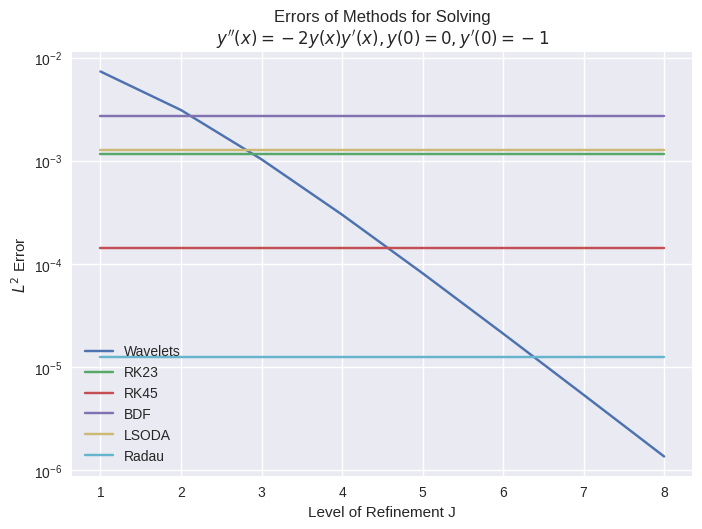

In [14]:
plt.plot(range(1, JMAX), l2_wavelets, label="Wavelets")

for k, v in l2_errors.items(): 
    plt.plot(range(1, JMAX), v, label=k)

plt.title(rf"Errors of Methods for Solving" +"\n" + rf"$y''(x) = - 2 y(x) y'(x), y(0) = 0, y'(0) = -1$")
plt.yscale("log")
plt.xticks(range(1, JMAX))
plt.xlabel("Level of Refinement J")
plt.ylabel("$L^2$ Error")
plt.legend()

In [101]:
def exactnl(n, x): 
    return - np.sqrt(2/n) * np.tan(np.sqrt(n/2) * x)

In [120]:
# y''(x) = -2 y(x) y'(x), y(0) = 0, y'(0) = -1 NOT A PAPER EXAMPLE! 
# y(x) = -tan(x) 
n = 3.9

J = 2
N = 2**(J + 1) 
j = np.arange(0, N)
x = (j + 0.5) / N

alpha1 = 0.
beta1 = -1.
a1 = beta1 - alpha1 

W = np.zeros((N, N)) 
f = np.zeros((N, )) 
a = np.zeros((N, ))

eps = 1.e-13
r = np.ones((N, 1))

iter_idx = 0 

while max(r) > eps: 
    #for j in range(N): 
    #    H = P1 = P2 = 0 
    H = np.zeros((N, ))
    P1 = np.zeros((N, ))
    P2 = np.zeros((N, ))
    
    for i in range(N): # things should start @ 1
        H += a[i] * haar(x, i+1, J) 
        P1 += a[i] * pi1(x, i+1, J)             
        P2 += a[i] * pi2(x, i+1, J) 

    #print(H.shape, P1.shape, P2.shape)
    #print(f.shape)
    f = n * (alpha1 + beta1 * x + P2) * (beta1 + P1) + H 
    #print(f.shape)

    for k in range(N): 
        W[:, k] = n * pi2(x, k+1, J) * (beta1 + P1) + 2 * (alpha1 + beta1 + x + P2) * pi1(x, k+1, J)  + haar(x, k+1, J) 

    #print(W.shape, (W@a).shape, f.shape)
    #a_new = lstsq(W, W@a - f, cond=None)[0]
    a_new = np.linalg.pinv(W) @ (W@a - f)
    
    #print(a_new.shape)
    r = np.abs(a_new - a) 
    #print(r.shape)
    print(max(r)) 

    a = a_new 
    iter_idx += 1


y = np.zeros((N, ))
S = np.zeros((N, ))

for i in range(N): 
    S += a[i] * pi2(x, i+1, J)

y = alpha1 + x * beta1 + S 

yexact = exactnl(n, x)
#yexact = - np.tan(x) 

3.3771461058618026
11.597543090838949
30.438705096186844
43.41406448580518
51.912553662543246
64.97743809384528
101.70337401465667
284.89212636531215
1334.1342123079203
425.38626021593086
189.63129659379018
105.57243709413794
72.72240261553384
61.05606230037117
62.85265281485704
83.25115306280031
168.2838691842084
2197.1546652434704
1929.7002351575793
1047.3270822087788
208.01267292459443
112.49832260162965
75.46432015895844
61.76855924424967
61.834575643797564
78.84485791724313
147.77397612845135
990.783262160844
1173.0146901915848
108.41469382544045
331.39190110635036
1121.7894385708946
270.4983555300367
135.42974727084402
84.56629915569663
64.71945802899894
60.34087026326827
70.22130945143539
111.91005817353701
362.9238291806349
1053.4789201210986
213.5913582828597
114.5825195344664
76.29204960087057
62.005636092678515
61.597374259894366
77.74311181552838
142.90483114133076
850.7001937279916
1096.025569320306
68.69255755972466
105.97604474021136
311.0156835672032
1191.7379477566342


KeyboardInterrupt: 

In [165]:
def wavelet_solve(J, n): 
    N = 2**(J + 1) 
    j = np.arange(0, N)
    x = (j + 0.5) / N

    alpha1 = 0.
    beta1 = -1.
    a1 = beta1 - alpha1 

    W = np.zeros((N, N)) 
    f = np.zeros((N, )) 
    a = np.zeros((N, ))

    eps = 1e-12
    gradepstol = 1e-3
    r = np.ones((N, 1))

    iter_idx = 0 

    while max(r) > eps: 
        #for j in range(N): 
        #    H = P1 = P2 = 0 
        H = np.zeros((N, ))
        P1 = np.zeros((N, ))
        P2 = np.zeros((N, ))

        for i in range(N): 
            H += a[i] * haar(x, i+1, J) 
            P1 += a[i] * pi1(x, i+1, J)             
            P2 += a[i] * pi2(x, i+1, J) 

        #print(H.shape, P1.shape, P2.shape)
        #print(f.shape)
        f = n * (alpha1 + beta1 * x + P2) * (beta1 + P1) + H 
        #print(f.shape)

        for k in range(N): 
            W[:, k] = n * pi2(x, k+1, J) * (beta1 + P1) + 2 * (alpha1 + beta1 + x + P2) * pi1(x, k+1, J)  + haar(x, k+1, J)

        #print(W.shape, (W@a).shape, f.shape)
        a_new = np.linalg.pinv(W) @ (W@a - f)
        #print(np.linalg.pinv(W).shape, (W@a - f).shape)
        #print(a_new.shape)
        #a_new = lstsq(W, W@a - f, cond=None)[0]
        #a_new = solve(W, W@a - f) # singularities 
        #a_new = scipy.linalg.inv(W) @ (W@a - f)
        #print(a_new.shape)
        r = np.abs(a_new - a) 
        #print(r.shape)
        print(max(r)) 

        a = a_new 
        iter_idx += 1


    y = np.zeros((N, ))
    S = np.zeros((N, ))

    for i in range(N): 
        S += a[i] * pi2(x, i+1, J)

    y = alpha1 + x * beta1 + S 

    return y, x

J = 3
n = 2
y, x = wavelet_solve(J, n)
yexact = exactnl(n, x)


1.449548231846924
1.2138177333078073
0.4287131752545519
0.08271550287164131
0.013217485060528
0.0016651861729535256
0.00017835228393248137
1.6918292271350666e-05
1.4680924140808571e-06
1.1884110096005429e-07
9.12574171785252e-09
6.716007749929531e-10
4.7825299276382793e-11
3.312017327061767e-12
2.2515322939398175e-13


In [98]:
def _integrator(Y, t): 
    return [Y[1], -n*Y[0]*Y[1]]
def _integrator2(t, Y): 
    return [Y[1], -n*Y[0]*Y[1]]

In [123]:
x

array([-0.03125,  0.03125,  0.09375,  0.15625,  0.21875,  0.28125,
        0.34375,  0.40625,  0.46875,  0.53125,  0.59375,  0.65625,
        0.71875,  0.78125,  0.84375,  0.90625])

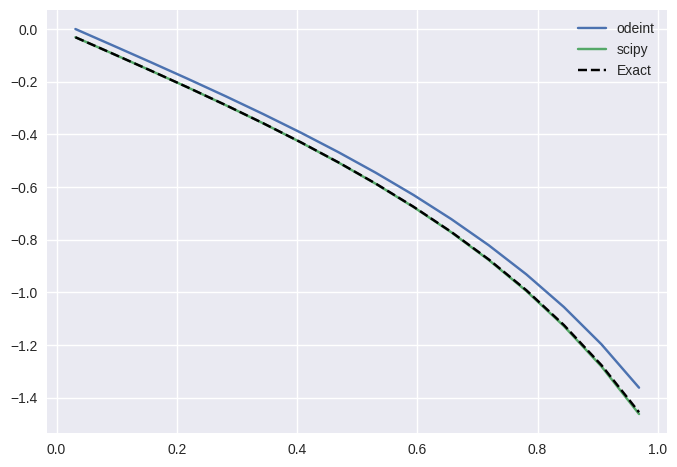

In [166]:
integrator_soln = integrate.odeint(_integrator, [0, -1], x) # , x
integrator_soln2 = integrate.solve_ivp(_integrator2, t_span=[0, x.max()], t_eval = x, y0=[0, -1], method='BDF') # , t_eval=x
plt.plot(x, integrator_soln[:,0], label='odeint')
plt.plot(x, integrator_soln2.y[0,:], label='scipy')
plt.plot(x, yexact, 'k--', label="Exact")

plt.legend()


In [4]:
def L2_error(approx, exact): 
    return np.sqrt(1 / len(approx) * np.sum((exact-approx)**2)) 

In [7]:
L2_error(y, yexact)

0.0010325950442207131

In [5]:
L2_error(y, yexact)

0.0014132635065390838

In [167]:
L2_error(y, yexact), L2_error(yexact, integrator_soln2.y[0,:]), L2_error(yexact, integrator_soln[:,0])

(0.0014132635065608292, 0.0026450260587477276, 0.050859408098230315)

In [133]:
x

array([0.015625, 0.046875, 0.078125, 0.109375, 0.140625, 0.171875,
       0.203125, 0.234375, 0.265625, 0.296875, 0.328125, 0.359375,
       0.390625, 0.421875, 0.453125, 0.484375, 0.515625, 0.546875,
       0.578125, 0.609375, 0.640625, 0.671875, 0.703125, 0.734375,
       0.765625, 0.796875, 0.828125, 0.859375, 0.890625, 0.921875,
       0.953125, 0.984375])

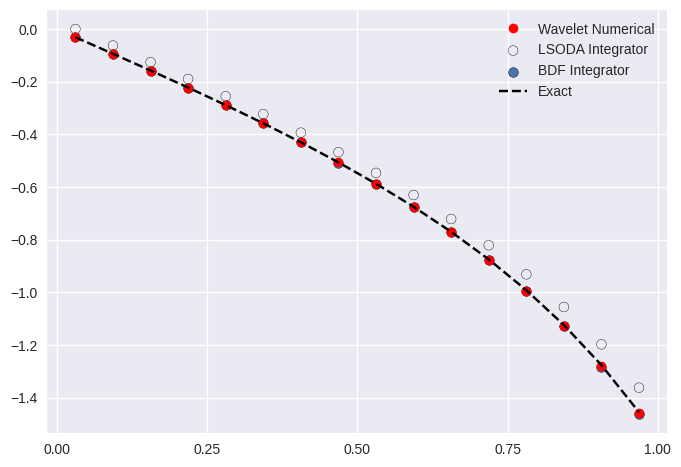

In [168]:
#plt.plot(x, y, marker='.',  markerfacecolor='white', markersize=24, label="Wavelet Numerical")
#plt.scatter(x, y, facecolors='none', edgecolors='r', label="Wavelet Numerical")
plt.plot(x, y, 'ro', label="Wavelet Numerical")
plt.scatter(x, integrator_soln[:,0], facecolors='none', edgecolors='k',  label="LSODA Integrator")
plt.scatter(x, integrator_soln2.y[0,:], edgecolors='k', label="BDF Integrator")
plt.plot(x, yexact, 'k--', label="Exact")
plt.xticks(np.linspace(0, 1, 5))
plt.legend()

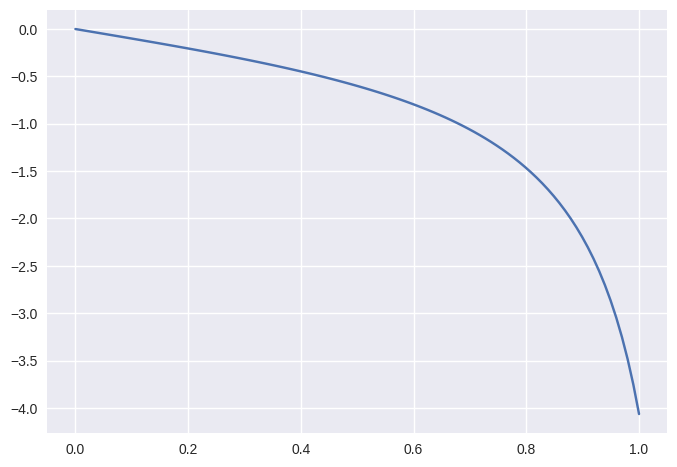

In [151]:
xsval = np.linspace(0, 1., 100, endpoint=True)

plt.plot(xsval, exactnl(n, xsval))

In [15]:
x.reshape(N, 1)


array([[-0.03125],
       [ 0.03125],
       [ 0.09375],
       [ 0.15625],
       [ 0.21875],
       [ 0.28125],
       [ 0.34375],
       [ 0.40625],
       [ 0.46875],
       [ 0.53125],
       [ 0.59375],
       [ 0.65625],
       [ 0.71875],
       [ 0.78125],
       [ 0.84375],
       [ 0.90625]])

In [17]:
x[9]

0.53125

In [ ]:
y = np.zeros((N, 1)) 

for j in range(N): 
    S = 0 
    for i in range(N): 
        S += a[i] * pi2(x[j], i, J) 
    
    y[j] = alpha1 * x[j] * beta1 + S